# __Data augumentation__

In [1]:
# import the required packages
import numpy as np
import os
import cv2

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Using TensorFlow backend.


# Load the Image Data

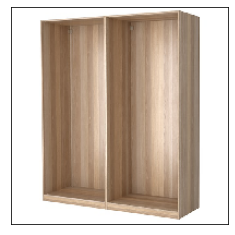

In [2]:
# This is module with image preprocessing utilities

from keras.preprocessing import image

DATADIR = "dataset" # folder where images are stored
CATEGORIES = ["chair", "table", "tv_storage", "wardrobes"] # categories of images

fnames = [os.path.join(DATADIR, fname) for fname in os.listdir(DATADIR)]

# We pick one subcategories of image to "augment"
#img_path = fnames[3] this is for wardrobes images, the img_path_list will have the paths of all 
# images of this wardrobes sub folder
img_path_list = [os.path.join(fnames[3], fname) for fname in os.listdir(fnames[3])]

# pick one image
img_path = img_path_list[3] 

# Read the image and resize it and display it
img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()


# Convert it to a Numpy array with shape (150, 150, 3)
data = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
sample = data.reshape((1,) + data.shape)


In [3]:
sample.shape

(1, 200, 200, 3)

## __Let's explore different augumentation parameter__

### __Horizontal and Vertical Shift Augmentation__

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same. This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shift respectively.

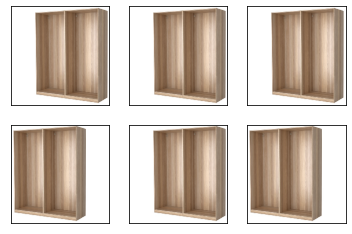

In [4]:
# width_shift_range
datagen = ImageDataGenerator(width_shift_range=[-22,22])
# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

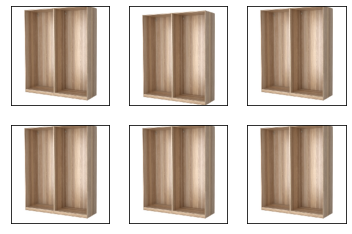

In [5]:
# height_shift_range 
datagen = ImageDataGenerator(height_shift_range=[-5,5])
# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

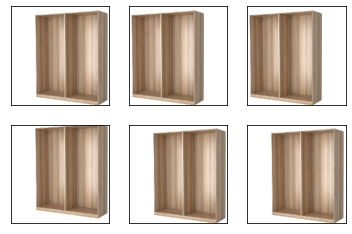

In [6]:
# combining height_shift and width_shift

datagen = ImageDataGenerator(height_shift_range=[-5,5],
                             width_shift_range=[-22,22])
# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

## Horizontal and Vertical Flip Augmentation

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor.

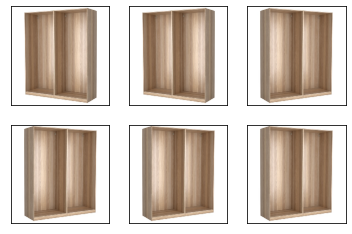

In [7]:
# Horizontal Flip 
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

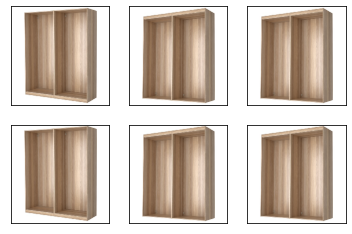

In [8]:
# Vertical Flip
datagen = ImageDataGenerator(vertical_flip=True)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

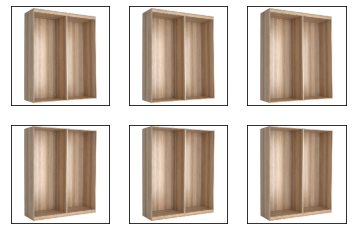

In [9]:
# combining horizontal and vertical flip
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

## Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

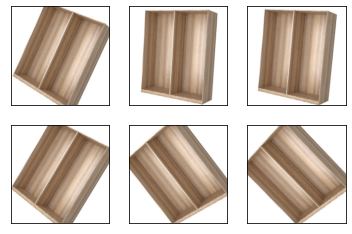

In [10]:
# random rotation
datagen = ImageDataGenerator(rotation_range=45)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

## Random Zoom Augmentation

A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. We can specify the percentage of the zoom as a single float or a range as an array or tuple.

If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if we specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).

The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

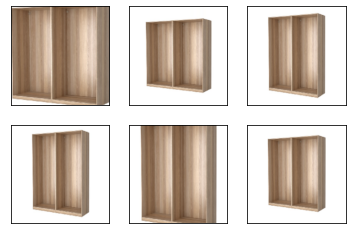

In [11]:
## Combining all the above parameters 

# Vertical Flip
datagen = ImageDataGenerator(zoom_range=0.3)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

## Shear Intensity

Shear transformation slants the shape of the image. This is different from rotation in the sense that in shear transformation, we fix one axis and stretch the image at a certain angle known as the shear angle. This creates a sort of ‘stretch’ in the image, which is not seen in rotation. shear_range specifies the angle of the slant in degrees.

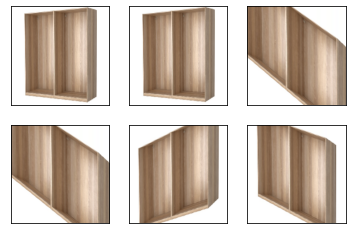

In [12]:

datagen = ImageDataGenerator(shear_range=60)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

## Channel Shift

Channel shift randomly shifts the channel values by a random value chosen from the range specified by channel_shift_range

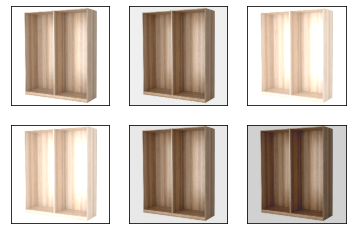

In [15]:
import random 
channel_shift_test = random.randrange(100,120)

datagen = ImageDataGenerator(channel_shift_range=channel_shift_test)

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

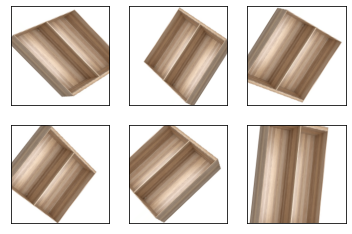

In [17]:
## Combining all the above parameters 

# use random value between 100 and 120 to select channel shift value
import random 
ch_shift = random.randrange(100,120)

datagen = ImageDataGenerator(height_shift_range=[-5,5],
                             width_shift_range=[-22,15],
                             horizontal_flip=True,
                             vertical_flip=True,
                             zoom_range=0.3,
                             rotation_range=45,
                             shear_range=15.0,
                             #channel_shift_range=ch_shift, 
                             fill_mode='nearest')

# prepare iterator
it = datagen.flow(sample, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(2,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()